### Stochastic vol ## Mean Reversion

Ornstein-Uhlenbeck Process
$$
dX_{t} = \theta(\mu-X_{t})dt +  \sigma dW_{t} \   (\theta > 0)
$$
it can be transformed into the following in discrete time
$$
X_{t+\tau} = A + BX_{t} + C_{\epsilon_{t+\tau}}
$$
which means it's a AR($\tau$) process  

Heston model includes a stochastic vol to tackle with vol smile  

It has a mean reversion part similar to OU process

$$
dV_{t} = \mu S_{t}dt +  \sqrt{V_{t}} S_{t} \ dW_{t1}
$$
$$
dV_{t} = \kappa(\theta-X_{t})dt +  \sigma \sqrt{V_{t}} dW_{t2}
$$
$$
dW_{t1}dW_{t2} = \rho dt \ (\rho < 0 \ normally)
$$

Feller Condition to keep $\sigma$ > 0 
$$
2\kappa\theta - \sigma^2 > 0 
$$

For model parameters calibration just do the least square optimisation of the prices (model&market) for all the options in the market at a time with Feller condition applied

In [67]:
import pandas as pd
import yfinance as yf

In [68]:
start = '1990-01-01'
end = '2024-04-01'
# Fetch the VIX, SPY data
vix = yf.Ticker("^VIX")
vix_history = vix.history(start=start, end=end, period="max")
spy = yf.Ticker("SPY")
spy_history = spy.history(start=start, end=end, period="max")

In [72]:
vix_history['vix_returns'] = vix_history.Close.pct_change()
spy_history['spy_returns'] = spy_history.Close.pct_change()

In [79]:
vix_history.index = vix_history.index.strftime('%Y-%m-%d')
spy_history.index = spy_history.index.strftime('%Y-%m-%d')

In [80]:
vix_spy = pd.concat([vix_history[['vix_returns']], spy_history[['spy_returns']]], axis=1)

In [81]:
vix_spy.dropna(inplace=True)

In [82]:
vix_spy

,vix_returns,spy_returns
Date,,
1993-02-01,-0.007246,0.007112
1993-02-02,-0.006488,0.002119
1993-02-03,-0.010612,0.010571
1993-02-04,0.014026,0.004184
1993-02-05,0.049634,-0.000694
...,...,...
2024-03-22,0.010836,-0.001896
2024-03-25,0.009954,-0.002763
2024-03-26,0.003791,-0.001847


In [83]:
vix_spy.corr() # Corr(VIX, SPY) < 0, # VXX 

,vix_returns,spy_returns
vix_returns,1.000000,-0.707154
spy_returns,-0.707154,1.000000


In [ ]:
# sentiment analysis for VXX

In [86]:
vxx = yf.Ticker("VXX")
vxx_history = vxx.history(start=start, end=end, period="1d")

In [88]:
import matplotlib.pyplot as plt

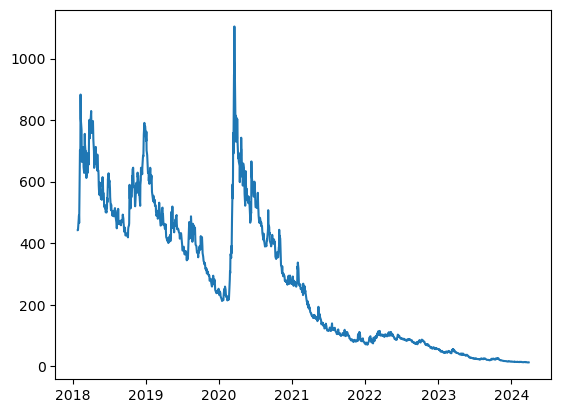

In [93]:
plt.plot(vxx_history['Close'])